In [2]:
from pymongo import MongoClient
import json
from collections import Counter
import glob
import os
from pathlib import Path
from PIL import Image

In [3]:
images_dir = Path('./images')

In [4]:
mongo = MongoClient('172.17.0.1', 27017)
db = mongo['bad-vis']
posts = db['posts']

In [7]:
imagemeta = db['imagemeta']

In [8]:
Counter([i['image_order'][0] for i in imagemeta.find()])

Counter({'preview': 4441,
         'external_link': 3383,
         'archive': 120,
         'thumbnail': 74})

In [9]:
len({i['post_id'] for i in imagemeta.find()})

7826

In [10]:
len([i for i in imagemeta.find({'phash': 'c0de6a3e14613de5'})])

0

In [11]:
image_ids = ['reddit/dataisugly/1tclw5:0', 'reddit/dataisugly/28rgez:0', 'reddit/dataisugly/34xxf6:0', 'reddit/dataisugly/2x1the:0', 'reddit/dataisugly/245agu:0', 'reddit/dataisugly/5i4i7k:0', 'reddit/dataisugly/29fugw:0', 'reddit/dataisugly/2zrizi:0', 'reddit/dataisugly/1ktavo:0', 'reddit/dataisugly/1zzxxs:0', 'reddit/dataisugly/24ammj:0', 'reddit/dataisugly/36vg4y:0', 'reddit/dataisugly/308tua:0']

In [ ]:
{imagemeta.find_one() for i in image_ids}

In [43]:
Counter([i['phash'] for i in imagemeta.find()]).most_common()[:40]

[('c0de6a3e14613de5', 33),
 ('c1cf027147e6e1e9', 8),
 ('af3a818d30b34f78', 7),
 ('ea7e94695a3e3828', 5),
 ('b090cd6fb7613994', 5),
 ('d1c66d8132b783b5', 5),
 ('e6b4994999666695', 4),
 ('ec4be0e062cece6c', 4),
 ('f5550a8a8e0f2f2d', 4),
 ('8f684c1aba9bd1d1', 4),
 ('eb59a4279466d2b4', 4),
 ('c040e2aa7b5b1f97', 4),
 ('bf3e40611e6a751a', 4),
 ('a6c6d9d9d991cc30', 4),
 ('b5f80cd313d58633', 4),
 ('a080e7a69cb6da7a', 4),
 ('ad92d2696518cacf', 4),
 ('ef8099adc231b94e', 4),
 ('9dde94589870c70f', 3),
 ('c7d4192bf41c0bdc', 3),
 ('acc6d3989330cb9b', 3),
 ('9125db52c48dadd9', 3),
 ('b6a26ccd897999c8', 3),
 ('f9c0d71e99274a34', 3),
 ('ff01805b017f057f', 3),
 ('ea85959597706768', 3),
 ('ff9911311f1b1915', 3),
 ('ea7097cc93cae452', 3),
 ('9de0d21ce0ef3896', 3),
 ('a4fdd9216906669b', 3),
 ('a49bd2649b3689f2', 3),
 ('ff80fd7e800972c1', 3),
 ('d4dc238f9f484f28', 3),
 ('ea54156c4c9a3f95', 3),
 ('b739793bc822c6e0', 3),
 ('cf7234ce836c88b3', 3),
 ('bf81c06ab15bc8b6', 3),
 ('a6995ba549b644b3', 3),
 ('cf8136be

In [44]:
imageMeta = imagemeta.find_one({'phash': 'd4dc238f9f484f28'})

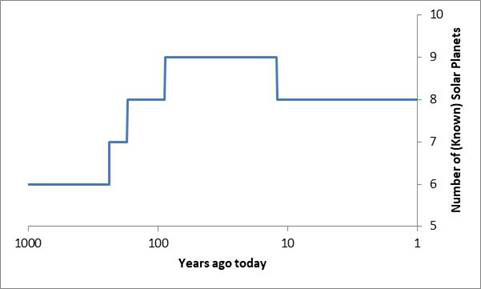

In [45]:
Image.open(imageMeta['file_path'])

## Valid image URLs

In [3]:
all_posts = [p for p in posts.find()]

In [4]:
source_url = {'https://www.reddit.com/r/dataisugly', 'https://badvisualisations.tumblr.com/', 'https://viz.wtf/'}

In [5]:
output = [p for p in all_posts
              if p['source_url'] in source_url and
                 p['preview']['url'] != '' and
                 p['thumbnail']['url'] != '' and
                 p['media_type'] == 'image'
         ]
len(output) # expected to have valid images

6600

In [6]:
results = [r for r in db['dlarchiveresults'].find() if 'status' in r and (r['status'] == 'exists' or r['status'] == 'downloaded')]
len(results)

0

In [7]:
results = [r for r in db['dlarchiveresults'].find() if 'status' in r and r['status'] == 'skip_content_type']
len(results)

0

In [8]:
results = [r for r in db['dlarchiveresults'].find() if 'archive_status' in r and r['archive_status'] == 'archive_not_found']
len(results)

0

In [9]:
Counter([r['status'] for r in db['dlarchiveresults'].find() if 'status' in r])

Counter()

In [25]:
%%time
posts_with_image = [p for p in posts.find() if glob.glob(f"images/*/*/*/{p['id']}*")]

CPU times: user 2min 12s, sys: 1min 2s, total: 3min 15s
Wall time: 3min 15s


In [27]:
len(posts_with_image)

7852

In [30]:
len(all_posts) - len(posts_with_image)

918

In [31]:
for p in [posts.find_one()]:
    print(p['id'])
    print(glob.glob(f"images/*/*/*/{p['id']}*"))

66i283
['images/preview/reddit/dataisugly/66i283.jpg', 'images/thumbnail/reddit/dataisugly/66i283.jpg', 'images/external_link/reddit/dataisugly/66i283.jpg']


In [32]:
Counter([p['id'] for p in all_posts]).most_common()[:10]

[('66i283', 1),
 ('e2cvur', 1),
 ('6h6cr9', 1),
 ('4xjubo', 1),
 ('boo6ld', 1),
 ('6wqste', 1),
 ('8msftx', 1),
 ('5a0wp5', 1),
 ('a3gj0h', 1),
 ('bzk2hf', 1)]

In [20]:
Counter([os.path.splitext(name)[1] for _, _, files in os.walk(images_dir) for name in files])

Counter({'.jpg': 11071, '.png': 7728, '.gif': 128})

# Download results

In [ ]:
# df_dl_preview_results = pd.DataFrame.from_records(dl_preview_results)
# df_dl_preview_results.loc[(df_dl_preview_results['status'] != 'exists') &
#                           (df_dl_preview_results['status'] != 'invalid_url') &
#                           (~df_dl_preview_results['status'].isnull()) &
#                           (df_dl_preview_results['status'] != 'downloaded')].to_csv('./dl_preview_results.csv', index=False)

In [ ]:
# df_dl_thumbnail_results = pd.DataFrame.from_records(dl_thumbnail_results)
# df_dl_thumbnail_results.loc[(df_dl_thumbnail_results['status'] != 'exists') &
#                             (df_dl_thumbnail_results['status'] != 'invalid_url') &
#                             (~df_dl_thumbnail_results['status'].isnull()) &
#                             (df_dl_thumbnail_results['status'] != 'downloaded')].to_csv('./dl_thumbnail_results.csv', index=False)

In [ ]:
# df_dl_external_link_results = pd.DataFrame.from_records(dl_external_link_results)
# df_dl_external_link_results.loc[(df_dl_external_link_results['status'] != 'exists') &
#                           (df_dl_external_link_results['status'] != 'invalid_url') &
# #                           (df_dl_external_link_results['status'] != 'not_found') &
# #                           (df_dl_external_link_results['status'] != 'http_error') &
#                           (~df_dl_external_link_results['status'].isnull()) &
#                           (~df_dl_external_link_results['status'].str.contains('skip_')) &
#                           (df_dl_external_link_results['status'] != 'downloaded')].to_csv('./dl_external_link_results.csv', index=False)

## Tags

In [24]:
c = Counter([t for p in posts.find() for t in p['tags']])

In [25]:
c.most_common()[:50]

[('WTFViz', 2119),
 ('Percentages', 985),
 ('BarChart', 705),
 ('submission', 704),
 ('PieChart', 477),
 ('DonutChart', 373),
 ('3D', 304),
 ('Radial', 276),
 ('Bad Scale', 231),
 ('Diagram', 162),
 ('Map', 156),
 ('Pie Gore', 150),
 ('LabelLines', 147),
 ('Clusterfuck', 139),
 ('LineChart', 131),
 ('OC', 113),
 ('What the Fuck?', 94),
 ('Iconography', 88),
 ('StackedBarChart', 84),
 ('Agendas Gone Wild', 81),
 ('Timeline', 81),
 ('Wedges', 70),
 ('Arrows', 69),
 ('BubbleChart', 67),
 ('CoxcombChart', 63),
 ('Euler', 61),
 ('R2: Nothing wrong', 55),
 ('data visualisation', 50),
 ('AreaChart', 45),
 ('data visualization', 42),
 ('NotPartToWhole', 35),
 ('Venn', 32),
 ('R1: Parody', 31),
 ('bar graph', 29),
 ('Rainbow', 28),
 ('Area/Volume', 27),
 ('Clock', 26),
 ('3D is Cool!', 25),
 ('NotPartWhole', 25),
 ('R3: Dataisbeautiful', 20),
 ('Flawed Flows', 19),
 ('PartToWhole', 19),
 ('Scatterplot', 18),
 ('NetworkDiagram', 16),
 ('NotPeriodic', 16),
 ('TriangleChart', 15),
 ('Dial', 15),
 

## Author

In [26]:
c = Counter([p['author'] for p in posts.find() if 'author' in p])

In [27]:
c.most_common()[:50]

[('', 1374),
 ('rhiever', 80),
 ('CJMinard', 58),
 ('minimaxir', 36),
 ('zonination', 34),
 ('[deleted]', 31),
 ('akeemtheafricandream', 28),
 ('NelsonMinar', 24),
 ('jensyao', 20),
 ('confused_confucius07', 19),
 ('ProgVal', 17),
 ('OllyTwist', 16),
 ('Renegade_Meister', 15),
 ('zevobh', 14),
 ('denacioust', 14),
 ('Epistaxis', 12),
 ('almodozo', 11),
 ('misnamed', 11),
 ('suity1', 10),
 ('WE_THEPEOPLE', 10),
 ('phil_blumpkin', 10),
 ('wspaniel', 10),
 ('SymphMeta', 10),
 ('iqueerified', 9),
 ('WHY_DO_I_SHOUT', 8),
 ('crvc', 8),
 ('Thefriendlyfaceplant', 8),
 ('MatthewLaw', 8),
 ('Batrachus', 8),
 ('colako', 8),
 ('pongpingpongpingpong', 7),
 ('Catharrrsis', 7),
 ('DiamondMinah', 7),
 ('nate_silver_surfer', 7),
 ('Curran919', 7),
 ('toot_ma_boot', 7),
 ('Null_HHockey', 7),
 ('mrdelayer', 7),
 ('ar_604', 6),
 ('wheresflateric', 6),
 ('ofsinope', 6),
 ('Reddits_Worst_Night', 6),
 ('rocketman0739', 6),
 ('--DrScience--', 6),
 ('bubbles212', 6),
 ('mrgann', 6),
 ('owmyfoothurts', 6),
 ('v